In [61]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

from scipy.fftpack import fft, ifft
from scipy import signal
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.cluster import KMeans

In [3]:
train_df = pd.read_csv('../../train/train.csv', dtype={'acoustic_data': np.int8, 'time_to_failure': np.float64})

In [5]:
quakeind1 = 5656574
quakeind3 = 104677355
# train = float_data[quakeind1:quakeind2]

In [6]:
float_data=train_df[quakeind1:quakeind3].values

In [7]:
float_data.shape

(99020781, 2)

In [9]:
X_matrix, y = convertdata(float_data, 1000)


In [10]:
del float_data

In [11]:
X_matrix.shape

(99020, 1000)

In [58]:
def create_FFT_feature(x, fs=4000000):
    fft = abs(np.fft.fft(x))
    timestep = len(x)/fs
    freq = np.fft.fftfreq(len(x), d=timestep)
    i = int(len(x)/2)
    freq = freq[1:i]
    fft = fft[1:i]    
    ind = fft.argmax()
    frequency = freq[ind]
    return frequency, freq, fft

def convertdata(float_data, step_size):
    X = float_data[:,0]
    y = float_data[:,1]
    rows = X.shape[0]//step_size
    X = X[:rows*1000]
    X = X.reshape(rows,1000)
    y = [y[t] for t in range(999,len(y),1000)]
    return X, np.array(y)

def create_FFT_feature(x, fs=4000000):
    fft = abs(np.fft.fft(x))
    timestep = len(x)/fs
    freq = np.fft.fftfreq(len(x), d=timestep)
    i = int(len(x)/2)
    freq = freq[1:i]
    fft = fft[1:i]    
    ind = fft.argmax()
    frequency = freq[ind]
    return frequency, freq, fft

def classic_sta_lta(x, length_sta, length_lta):
    
    sta = np.cumsum(x ** 2)

    # Convert to float
    sta = np.require(sta, dtype=np.float)

    # Copy for LTA
    lta = sta.copy()

    # Compute the STA and the LTA
    sta[length_sta:] = sta[length_sta:] - sta[:-length_sta]
    sta /= length_sta
    lta[length_lta:] = lta[length_lta:] - lta[:-length_lta]
    lta /= length_lta

    # Pad zeros
    sta[:length_lta - 1] = 0

    # Avoid division by zero by setting zero values to tiny float
    dtiny = np.finfo(0.0).tiny
    idx = lta < dtiny
    lta[idx] = dtiny

    return (sta / lta)

def m_pow_sta_vec(x, w_size, sta_len, lta_len):
    v = []
    v.append(classic_sta_lta(x, 10, 100))
    mv = np.array([0]*50 + [x[i-w_size:i+w_size].mean() for i in range(w_size,len(x))])
    v.append(mv)
    pv = np.array([0]*50 + [np.sum(x[i-w_size:i+w_size]**2) for i in range(w_size,len(x))])**(.5)
    v.append(pv)
    return v

# plt.plot(classic_sta_lta(X_matrix[0], 10, 100))
# print(float_data.shape)
# for vector in m_pow_sta_vec(X_matrix[:],50,10,100)[:-1]:
#     plt.plot(vector)
# plt.show()

X_features = np.apply_along_axis(m_pow_sta_vec, 1, X_matrix, 50, 10, 100)



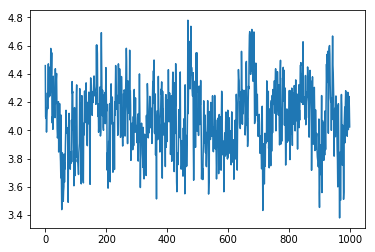

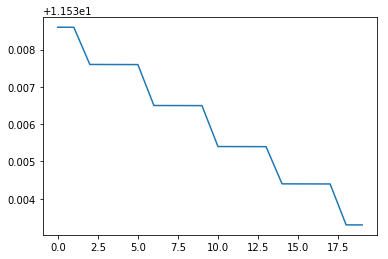

In [87]:
new_X_features = X_features[:1000].mean(axis=2)
new_X_features.shape
new_X_features[:,2]

plt.plot(new_X_features[:,1])
plt.show()
plt.plot(y[10:30])
# kmeans = KMeans(n_clusters=2, random_state=0).fit(X_features)

In [14]:

# X_feature = np.c_[X_matrix.std(axis=1),
#                 X_matrix.max(axis=1),
#                 X_matrix.min(axis=1),
#                 X_matrix.mean(axis=1),
#                 np.apply_along_axis(create_FFT_feature, 1, X_matrix, 4000000)[:,0],
#                 np.apply_along_axis(classic_sta_lta, 1, X_matrix, 10, 200)]
                  


In [ ]:
# fig, ax1 = plt.subplots()

# time_to_failure = float_data[:,1]
# acoustic = float_data[:,0]

# color = 'tab:red'
# ax1.set_xlabel('index')
# ax1.set_ylabel('time [s]', color=color)
# ax1.plot(time_to_failure, color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
# ax2.plot(acoustic, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()
# plt.plot(float_data[40000000:45000000:,1])
# print(len(float_data))


# print(len(float_data))
# print(y.shape)
# 44000000:44500000

# l = []
# for i in range(100):
# # plt.plot(X_matrix[i])
#     l.append(classic_sta_lta(X_matrix[i], 20, 100).mean())
    
# k = []
# for j in range(100,200):
#     k.append(classic_sta_lta(X_matrix[j], 20, 500).mean())
# # z = [item for sublist in l for item in sublist]
# plt.plot(l)
# plt.plot(k)
# # plt.legend(['1k','2k','3k','4k','5k'])
# plt.show()
# plt.plot(float_data[:200000:,1])

# create_FFT_feature(z)

In [15]:
df = pd.DataFrame({'std':X_feature[:,0],'max':X_feature[:,1],'min':X_feature[:,2],'mean':X_feature[:,3],'freq':X_feature[:,4],'sta/lta':X_feature[:,5],'y':y})

In [16]:
# create_FFT_feature(X_matrix[0])[0]
# X_matrix[1000]
df.to_csv('diff_format.csv', index=False)

In [17]:
X_feature.shape

(629145, 6)

In [66]:
f, freqarray, fft = create_FFT_feature(x_test_part[:1000], fs)
print(f)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.plot(freq,fft)

NameError: name 'x_test_part' is not defined

In [ ]:
from __future__ import division

In [ ]:
# https://www.kaggle.com/c/LANL-Earthquake-Prediction/discussion/77526#latest-524621
seg_t = 0.0375
N = 150000
fs = N*(1/seg_t)# 4MHz
bin_chunk = 1000

f, t, Zxx = create_stft_feature(x_test_part[:1024], fs)
plt.plot(x_test_part[:1000])

In [ ]:
c = plt.pcolormesh(t, f, np.abs(Zxx))
plt.show(c)